# Realizando a conexão com o driver

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
%cd '/gdrive/My Drive/PDFS'
%ls

/gdrive/My Drive/PDFS
'comorbidades  com doses  e data..csv'   Download_arquivos_01_11_2021.txt
 comorbidade.txt                         Download_arquivos_28_10_2021.txt
 Contador_ID.txt                         Download_arquivos_29_10_2021.txt
'dados publicacao.csv'                   Download_arquivos_31_10_2021.txt


# Importando a base de dados

In [ ]:
import zipfile
import pandas as pd
import time

# Realizando o download da base

dados = !wget --no-check-certificate https://sage.saude.gov.br/dados/sisagua/controle_mensal_amostras_fora_padrao.zip

# Pegando os CSV's que se encontravam zipados

with zipfile.ZipFile('controle_mensal_parametros_basicos_2021.zip',"r") as zip_ref:
    zip_ref.extractall("Sisagua")

time.sleep(20)

%cd 'Sisagua'
%ls

# Lendo o Dataframe

df = pd.read_csv('controle_mensal_parametros_basicos_2021.csv', encoding='latin_1',sep=';',decimal=',',
                 dtype={'Código IBGE':'object','CNPJ da Instituição':'object',r'CNPJ do escritório regional/local':'object'})

/gdrive/My Drive/PDFS/Sisagua
controle_mensal_parametros_basicos_2021.csv


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,6,7,9,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Visão geral do formato das colunas

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8682233 entries, 0 to 8682232
Data columns (total 22 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   Região Geográfica                  object 
 1   UF                                 object 
 2   Regional de Saúde                  object 
 3   Código IBGE                        object 
 4   Município                          object 
 5   Tipo da Instituição                object 
 6   Sigla da Instituição               object 
 7   Nome da Instituição                object 
 8   CNPJ da Instituição                object 
 9   Nome do escritório regional/local  object 
 10  CNPJ do escritório regional/local  object 
 11  Tipo da Forma de Abastecimento     object 
 12  Código Forma de abastecimento      object 
 13  Nome da Forma de Abastecimento     object 
 14  Nome da ETA / UTA                  object 
 15  Tipo de Filtração                  object 
 16  Ano de referência 

# Contagem de valores nulos

In [ ]:
df.isnull().astype(int).sum()

Região Geográfica                          0
UF                                         0
Regional de Saúde                          0
Código IBGE                                0
Município                                  0
Tipo da Instituição                   143353
Sigla da Instituição                 5523990
Nome da Instituição                   143353
CNPJ da Instituição                   143353
Nome do escritório regional/local    5523990
CNPJ do escritório regional/local    5523990
Tipo da Forma de Abastecimento             0
Código Forma de abastecimento              0
Nome da Forma de Abastecimento             0
Nome da ETA / UTA                    6138349
Tipo de Filtração                    1686520
Ano de referência                          0
Mês de referência                          0
Ponto de Monitoramento                     0
Parâmetro                                  0
Campo                                      0
Valor                                      0
dtype: int

# Conferindo se existem 27 UF's

In [ ]:
df['UF'].value_counts()

SP    4179199
RS    1298124
PR     703665
MG     649807
SC     309652
BA     301676
GO     157446
CE     142110
MA     139729
MS     122159
TO     114692
MT     110949
RJ     107408
ES      89010
AL      51701
PE      34644
PB      29693
DF      29069
RN      25777
SE      24420
AM      16671
PI      15869
PA      10578
RR       9440
AC       5105
RO       3323
AP        317
Name: UF, dtype: int64

# Conferindo se as 5 regiões estão corretas

In [ ]:
df['Região Geográfica'].value_counts()

SUDESTE         5025424
SUL             2311441
NORDESTE         765619
CENTRO-OESTE     419623
NORTE            160126
Name: Região Geográfica, dtype: int64

# Número de municípios distintos presentes na base

In [ ]:
df['Município'].value_counts().count()

4253

# Conferindo se o Código IBGE está indexado corretamente

In [ ]:
(df.drop_duplicates(subset ="Código IBGE", keep = 'last')['Código IBGE']).to_csv('new.csv', index=False)

Existem 31 códigos IBGE que não tiveram correspondência com a base disponibilizada pelo Ministério da saúde, sendo estes:

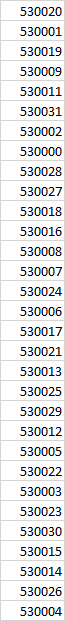

Conferindo quais municipios são referentes os códigos do IBGE 

In [ ]:
df[df['Código IBGE']=='530004'].head(1)

,Região Geográfica,UF,Regional de Saúde,Código IBGE,Município,Tipo da Instituição,Sigla da Instituição,Nome da Instituição,CNPJ da Instituição,Nome do escritório regional/local,CNPJ do escritório regional/local,Tipo da Forma de Abastecimento,Código Forma de abastecimento,Nome da Forma de Abastecimento,Nome da ETA / UTA,Tipo de Filtração,Ano de referência,Mês de referência,Ponto de Monitoramento,Parâmetro,Campo,Valor
1526865,CENTRO-OESTE,DF,UNICA,530004,BRAZLANDIA,Regional,CAESB,COMPANHIA DE SANEAMENTO AMBIENTAL DO DISTRITO ...,82024000137,CAESB REGIONAL UNICA,82024000137,SAA,S530004000001,BRAZLÂNDIA,ETA BRAZLÂNDIA (ETA.BRZ.001),SEM FILTRAÇÃO,2021,2,Pós-filtração ou Pré-desinfecção,Turbidez (uT),Número de amostras analisadas,672.0


# Tipos de instituições presentes na base

In [ ]:
df['Tipo da Instituição'].value_counts()

Local       5380637
Regional    3158243
Name: Tipo da Instituição, dtype: int64

# Siglas das 66 instituições presentes no banco com suas respectivas frequências

Algumas siglas se encontram cortadas ou com presença de espaçamentos na sua escrita

In [ ]:
pd.options.display.max_rows=1000

In [ ]:
df['Sigla da Instituição'].value_counts()

SABESP        391652
SANEPAR       327398
COPASA        323357
CORSAN        302912
EMBASA        265754
CASAN         147930
SANEAGO       132785
CAGECE        102038
LACUA SIST     89756
KF             89442
ESSENCIAL      79771
SANESUL        73302
FV             66804
SANEATINS      64914
CESAN          52592
ARTIBRAS       36582
COPANOR        30824
LABORPLAN      29791
CAESB          29069
COMPESA        28651
CEDAE          28567
HIDROFORTE     27620
SISAR          26074
CAEMA          25705
CAGEPA         25508
CAERN          24739
ATS            23449
DESO           22902
AGUA E SOL     20835
CASAL          14613
ECO DIEHL      14501
BRK AMBIEN     14101
ENTREVIAS      14028
VPAULISTA      13614
BIOSUL         11777
PRECISAO T     11302
AUTOBAN        11200
CART           10922
SPVIAS         10324
SOFT SUL P      9865
AB TRIANGU      7015
LICS R          6534
COSAMA          6446
GRILLO          5742
AB COLINAS      5498
RENOVIAS        5409
EDSON LUIS      5247
INTERVIAS    

# Conferindo se existe nomes de instituições preenchidos como número

In [ ]:
instituicao = list((df.drop_duplicates(subset ="Nome da Instituição", keep = 'last')['Nome da Instituição']))

In [ ]:
import collections

frequencia = []

for i in range(0,len(instituicao)):
  try:
    result = instituicao[i].isdigit()
    frequencia.append(result)
  except:
    print('Valor nulo encontrado')

counter=collections.Counter(frequencia)

print(counter)

Valor nulo encontrado
Counter({False: 8559})


# Conferindo se possui string na variavel CNPJ

In [ ]:
CNPJ = list((df.drop_duplicates(subset ="CNPJ da Instituição", keep = 'last')['CNPJ da Instituição']))

In [ ]:
frequencia = []

for i in range(0,len(CNPJ)):
  try:
    result = isinstance(CNPJ[i], str)
    frequencia.append(result)
  except:
    print('Valor nulo encontrado')

counter=collections.Counter(frequencia)

print(counter)

Counter({True: 9063, False: 1})


# Analisando o tamanho dos CNPJ's

In [ ]:
frequencia = []

for i in range(0,len(CNPJ)):
  try:
    result = sum(len(i) for i in CNPJ[i])
    frequencia.append(result)
  except:
    print('Valor nulo encontrado')

counter=collections.Counter(frequencia)

print(counter)

Valor nulo encontrado
Counter({14: 5971, 13: 2774, 12: 292, 11: 20, 10: 4, 9: 2})


# Conferindo se o nome da instituição regional / local esta preenchido como string

In [ ]:
instituicao = list((df.drop_duplicates(subset ="Nome do escritório regional/local", keep = 'last')['Nome do escritório regional/local']))

In [ ]:
import collections

frequencia = []

for i in range(0,len(instituicao)):
  try:
    result = instituicao[i].isdigit()
    frequencia.append(result)
  except:
    print('Valor nulo encontrado')

counter=collections.Counter(frequencia)

print(counter)

Valor nulo encontrado
Counter({False: 612})


# Conferindo se possui valores textuais na variavel CNPJ do escritório regional/local

In [ ]:
CNPJ = list((df.drop_duplicates(subset ="CNPJ do escritório regional/local", keep = 'last')['CNPJ do escritório regional/local']))

In [ ]:
frequencia = []

for i in range(0,len(CNPJ)):
  try:
    result = isinstance(CNPJ[i], str)
    frequencia.append(result)
  except:
    print('Valor nulo encontrado')

counter=collections.Counter(frequencia)

print(counter)

Counter({True: 430, False: 1})


# Conferindo a frequência de caracteres na variável CNPJ do escritório regional/local

In [ ]:
instituicao = list((df.drop_duplicates(subset ="CNPJ do escritório regional/local", keep = 'last')['CNPJ do escritório regional/local']))

In [ ]:
frequencia = []

for i in range(0,len(instituicao)):
  try:
    result = sum(len(i) for i in instituicao[i])
    frequencia.append(result)
  except:
    print('Valor nulo encontrado')

counter=collections.Counter(frequencia)

print(counter)

Valor nulo encontrado
Counter({True: 430})


# Tipo da forma de abastecimento

In [ ]:
df['Tipo da Forma de Abastecimento'].value_counts()

SAC    4451829
SAA    4230404
Name: Tipo da Forma de Abastecimento, dtype: int64

### Conferindo se tem nome preenchido apenas com números

In [ ]:
instituicao = list((df.drop_duplicates(subset ="Nome da Forma de Abastecimento", keep = 'last')['Nome da Forma de Abastecimento']))

In [ ]:
import collections

frequencia = []

for i in range(0,len(instituicao)):
  try:
    result = instituicao[i].isdigit()
    frequencia.append(result)
  except:
    print('Valor nulo encontrado')

counter=collections.Counter(frequencia)

print(counter)

Counter({False: 21852, True: 6})


# Análise do ano de referência

In [ ]:
df['Ano de referência'].value_counts()

2021    8682233
Name: Ano de referência, dtype: int64

# Mês de referência

In [ ]:
df['Mês de referência'].value_counts()

1     895495
6     891754
2     886461
4     882608
3     880464
5     871668
7     871151
8     853633
9     816077
10    717191
11    115074
12       657
Name: Mês de referência, dtype: int64

# Ponto de Monitoramento

In [ ]:
df['Ponto de Monitoramento'].value_counts()

SAÍDA DO TRATAMENTO                           2210852
PONTO DE CONSUMO                              2201044
Saída do tratamento (para água canalizada)    2166935
SISTEMA DE DISTRIBUIÇÃO                       1669632
Pós-filtração ou Pré-desinfecção               433770
Name: Ponto de Monitoramento, dtype: int64

# Campo

Existem diferentes classificações na variável, sendo que algumas delas se encontram incompletas

In [ ]:
df['Campo'].value_counts()

Número de amostras analisadas                       2312501
Percentil 95                                         428082
N de amostras com presença de coliformes totais      349172
N de amostras com ausência de coliformes totais      349160
Número de dados <= 15,0 uH                           346631
Número de dados > 15,0 uH                            346629
Número de dados < 0,2 mg/L                           345734
Número de dados > 2,0 mg/L e <= 5,0mg/L              344163
Número de dados >= 0,2 mg/L e <= 2,0mg/L             344162
Número de dados > 5,0 mg/L                           344161
N de amostras com presença para Escherichia coli     339149
N de amostras com ausência para Escherichia coli     339144
Número de dados > 9,0                                316880
Número de dados >= 6,0 e <= 9,0                      316879
Número de dados < 6,0                                316879
Número de dados > 5,0 uT                             261577
Número de dados <= 5,0 uT               

# Valor

In [ ]:
Valor = list((df.drop_duplicates(subset ="Valor", keep = 'last')['Valor']))

In [ ]:
frequencia = []

for i in range(0,len(Valor)):
  try:
    result = isinstance(Valor[i], str)
    frequencia.append(result)
  except:
    print('Valor nulo encontrado')

counter=collections.Counter(frequencia)

print(counter)

Counter({False: 11888})


# Realizando a busca pela chave primária

In [ ]:
(df.groupby(['Código Forma de abastecimento', 'Município','Mês de referência','Ponto de Monitoramento','Tipo de Filtração','Parâmetro','Campo']).size()).value_counts()

1     3778338
2       47254
3       17733
4        9322
5        6058
6        3307
7        2511
8        1818
9        1741
11        793
10        771
12        737
15        506
17        448
23        309
21        281
16        278
13        233
14        182
19        158
27        126
26        109
20        101
30         78
18         73
22         68
24         62
29         49
25         48
28          5
dtype: int64